In [1]:
# The notebook's environment might not recognise local installs of ADRpy, fix that now...
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..\\..\\..\\src")))

<img src="../img/ADRpy_splash.png" width="30%" align="left">

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from ADRpy import atmospheres as at
from ADRpy import unitconversions as uc

# Understanding Airspeeds

What do drivers, pilots, and captains all have in common?
All command vehicles and are responsible for ensuring the safe manoeuvre and transport of passengers and cargo.
A key parameter of normal operation is the ability to govern the speed of the vehicle - within both operating *and* performance limits. 

#### Operational speed limits

... are often defined by regulatory requirements for the safe navigation of the operating environment.
For example, railways often impose speed limits around curved sections of track, roads can include speed bumps to restrict speed in pedestrianised areas, and aircraft may be required to demonstrate a sufficient rate of climb to facilitate the airspace deconfliction requests of traffic controllers.

The operating speed of a vehicle also has direct implications on journey time (and therefore the operating schedule).
This is important when transportation delays can incur heavy opportunity costs to stakeholders.

#### Performance speed limits

... are otherwise dictated by the physical limitations of the vehicle's own design.
Consider as an example, that the dominant force resisting motion is usually that of fluid dynamic drag, which rises in proportion with the square of velocity ($F \propto V^2$).
Since $P=F\times V$, the thrust force required to overcome drag requires developing kinetic power in proportion to $V^3$.
Vehicle top speed is then a steady-state condition in which the design's aerodynamic efficiency (and required thrust) is balanced against the available engine power.

> 💡 **Consider:** A car travelling at 60 mph speeds up by 66 mph.
> While this is only a 10% increase in speed, some napkin-math tells us it results in around a 21% increase in aerodynamic drag ($1.1^2=1.21$) and a 33% increase in the required engine power ($1.1^3=1.331$).
> A fractional increase in speed demands an exponentially greater amount of propulsive power!

Additionally, the ultimate mechanical strength of parts can limit the safe top speed in different configurations.
Exceeding the rated design speed of the aircraft could generate static and/or dynamic loads that lead to structural damage or failure.
For example, the Grumman F-14 Tomcat has a maximum allowable *calibrated* airspeed of 225 knots with high lift devices deployed.
Exceeding this speed limit can cause the flap and slat actuation mechanisms to fail, "jamming" the surfaces in place.

#### Ground Speed vs. Fluid Speed

The horizontal speed of a vehicle with respect to the Earth's surface is its *ground speed*.
On a calm day, this is the same speed of the fluid (water or air) that bikes, cars, trains, ships, submarines, etc. encounter (directly impacting the magnitude of fluid dynamic forces like lift and drag that they experience).
The problem is that gusts, currents, and other turbulent phenomena often non-negligibly change the speed (and direction) of the fluid even when ground speed remains constant.

> 💡 **Consider:** A car travelling at a ground speed of 60 mph encounters a headwind of 6 mph.
> While this is only a 10% increase in speed of the fluid, our earlier napkin-math told us we'd find around a 21% increase in aerodynamic drag and a 33% increase in the required engine power.
> Even though the ground speed (and journey time) is the same, the extra fluid-dynamic resistance demands ~33% more power than the exact same journey on a calm day!

It's then a good idea to appreciate the rationale behind designated speeds, which leads to a better understanding of why we measure the speed of aircraft in the way we do:

- Aircraft speed relative to fluid: Relevant for design lift, drag, thrust, and power considerations (considerations mostly relating to the aircraft's design).
- Aircraft speed relative to Earth: Relevant for timetabling, scheduling, travel time.

## Measuring Speed

For cars, the job is simple.
Since the typical day-to-day operation of cars often does not involve them working at their extreme performance limits, fluid speed effects are mostly irrelevant to the average user.
Instrumentation linked to the gearbox/transmission can directly read the rotation rate of the driveshaft which, via the wheels, shares a linear relationship with the car's ground speed.

Unlike cars, ships do not directly contact the Earth's solid surface - and are instead suspended in fluid media.
To estimate the "ground speed" then, ships can take advantage of absolute reference points like those given through GPS or by means of celestial navigation.
This is not to say that fluid speed is irrelevant - in fact, there are far-reaching consequences for the speed of *best economy*, *flank speed*, or even in WW2, the targetting solutions of warships against hostile combatants.

A conventional means of estimating fluid speed is based on Bernoulli's principle

$$
\begin{array}{rcccc}
\text{constant}&=&p_{\text{hydraulic}} &+& p_{\text{dynamic}} \\
&=& (p_{\text{static}}+\rho g z )&+& \tfrac{1}{2} \rho V^2
\end{array}$$

In which the constant and conserved energy of a steady, incompressible fluid can be described as the sum of hydraulic (positional) pressure and dynamic (velocity) pressure, where $\rho$ is the fluid density, $g$ is the acceleration due to gravity, $z$ is the elevation above a reference datum, and $V$ is the true, average speed of particles in the (free)stream.

Consider a pressure probe reaching into the freestream with multiple *pressure taps*.
When the relatively small distance between pressure taps is considered to negligibly contribute to change in the fluid's gravitational potential between said taps, the term is often omitted

$$
\require{cancel}
\begin{array}{rcccc}
\text{constant} &=& p_{\text{static}} + \cancel{\rho g z} &+& \tfrac{1}{2} \rho V^2 \\
p_{\text{total}} &=& p_{\text{static}} &+& \tfrac{1}{2} \rho V^2 
\end{array}
$$

where the sum of static and dynamic pressures is often referred to as the total or stagnation pressure (the pressure after a moving fluid has been brought to rest).

Pressure taps perpendicular to the flow do not measure any of the dynamic pressure component, and thus the difference in pressure between flow-parallel and flow-perpendicular taps can be used to solve for the true speed of the fluid

$$V = \sqrt{\frac{2\cdot(p_{\text{total}} - p_{\text{static}})}{\rho}}$$

where $p_{\text{total}}$ is measured and experienced inside of pressure taps aligned with the flow (so long as the fluid is brought to rest inside of the tap by say, a wall), and taps not aligned with the flow only measure the ambient, static fluid pressure $p_{\text{static}}$.

### Instrument/Indicated Airspeed **(IAS)**

Which brings us neatly into the topic of airspeed.
So-called *pitot-static* systems capable of measuring the pressure differential between *total* and *static* pressure ports (taps), can easily resolve the difference in pressure mechanically using diaphragms

$$
V_{\text{IAS}}
= \sqrt{\frac{2\cdot(p_{\text{total}} - p_{\text{static}})}{\rho_{\text{SL}}}}
= \sqrt{\frac{2\cdot dp}{\rho_{\text{SL}}}}
$$

This is the *indicated airspeed* (IAS).
Historically, mechanical linkages allowed a deflection in the diaphragm (due to the tap pressure differential) to linearly and proportionately actuate a needle on the airspeed indicator (ASI) - but of course, there is no means of accounting for changes in air density due to altitude.
For this reason, the IAS computation assumes standard sea-level density.

The simplicity of this relationship makes it a very useful and reliable way for manufacturers to communicate important operating points, such as the stall speeds for approach, take-off, and clean configurations of an aircraft.

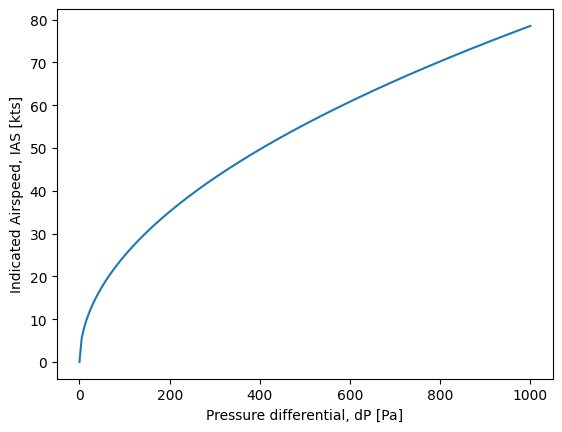

In [3]:
# Create pressure data, map to knots IAS
dp = np.linspace(0, 1e3, 200)
V_mpsIAS = (2 * dp / 1.225) ** 0.5
V_KIAS = uc.mps_kts(V_mpsIAS)

fig, ax = plt.subplots()
ax.plot(dp, V_KIAS)
ax.set_xlabel("Pressure differential, dP [Pa]")
ax.set_ylabel("Indicated Airspeed, IAS [kts]")
plt.show()

A shortcoming of pitot-static measurements is demonstrated above - i.e. for minute pressure differentials (such as those you might find on low-speed hobby aircraft or ships), the IAS is very sensitive to perturbations in the pressure reading.
This makes them unreliable in applications where accuracy in the low-speed regime is paramount.

### Calibrated Airspeed **(CAS)**

Traditional, analogue ASIs suffer from three types of error:
1. **Instrument error**, attributed to poor calibration and/or manufacturing defects.
2. **Position error**, relating to the idea that there is no position on an aircraft for which the static pressure vent is uninfluenced by aircraft angle of attack and/or sideslip.
3. **Lag error**, in which a rapid change of altitude and/or angle of attack/sideslip will cause the displayed airspeed to lag behind the value the ASI might have displayed had the aircraft been flying in steady-state conditions.

Typically, it is up to a manufacturer to determine the mapping from IAS to CAS in the form

$$V_{\text{CAS}} = V_{\text{IAS}} + \Delta \text{error}$$

where low-speed flight necessarily means greater angle of attack position error, and the changing flow field around the aircraft in different lift configurations impacts the local pressure around the static vents.
Modern aircraft with digital cockpits tend to include this mapping in-software and automatically present CAS on the electronic ASI to reduce pilot workload.

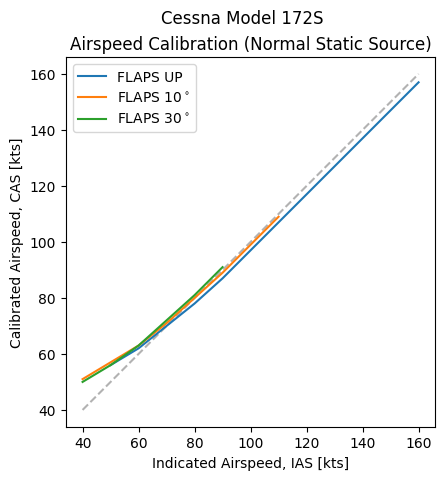

In [4]:
# Airspeed as read on the ASI
V_KIAS = np.arange(40, 170, 10)

# delta error in the ASI reading due to lift configuration and angle of attack
dV_flaps00 = np.array([np.nan, 6, 2, 0, -2, -3, -3, -3, -3, -3, -3, -3, -3])
dV_flaps10 = np.array([11, 7, 3, 1, 0, -1, -1, -1] + [np.nan] * 5)
dV_flaps30 = np.array([10, 6, 3, 2, 1, 1] + [np.nan] * 7)

fig, ax = plt.subplots()
fig.suptitle("Cessna Model 172S")
ax.set_title("Airspeed Calibration (Normal Static Source)")
ax.plot(V_KIAS, V_KIAS, ls="--", c="k", alpha=0.3)
ax.plot(V_KIAS, V_KIAS + dV_flaps00, label="FLAPS UP")
ax.plot(V_KIAS, V_KIAS + dV_flaps10, label="FLAPS 10$^\circ$")
ax.plot(V_KIAS, V_KIAS + dV_flaps30, label="FLAPS 30$^\circ$")
ax.set_xlabel("Indicated Airspeed, IAS [kts]")
ax.set_ylabel("Calibrated Airspeed, CAS [kts]")
ax.legend()
ax.set_aspect(1)
plt.show()

### True Airspeed **(TAS)**

The problem with CAS is that our dependence on Bernoulli's principle is stringent on the assumption that the flow is incompressible.
For Mach numbers $M > 0.3$, it is inappropriate to presume that this assumption still holds.
This is important as it is the true speed and density of the particles in the freestream that directly map aerodynamic performance coefficients to their respective forces and moments:

$$
\begin{eqnarray}
L
&=& q \cdot S C_L
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_L && \\ \\
D
&=& q \cdot S C_D
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_D && \\ \\
M
&=& q \cdot S C_M \cdot c \,\,
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_M &\cdot c& \\
\end{eqnarray}
$$

In addition, as the true airspeed accurately describes the speed of the oncoming air in the aircraft's frame of reference - it by definition is also describing the true speed of the aircraft in the frame of reference of the Earth (assuming no wind).

Therefore at high speed where compressibility effects apply, the CAS as reported by the ASI is both an inaccurate reflection of the aerodynamic situation and inconvienient for navigation (although the advent of GPS and similar positioning tools have all but made this use case defunct).

The incompressible static-to-total pressure ratio from Bernoulli's principle is

$$
\frac{p_{\text{static}}}{p_{\text{total}}}
= \frac{1}{1 + (p_{\text{total}} - p_{\text{static}}) / p_{\text{static}}}
= \frac{1}{1 + (\tfrac{1}{2}\rho_{\text{SL}}{V_{\text{CAS}}}^2) / p_{\text{static}}}
$$

Isentropic flow relations tell us that in a compressible flow

$$
\frac{p_{\text{static}}}{p_{\text{total}}}
= \left(1 + \frac{\gamma - 1}{2} M^2 \right)^{-\gamma / (\gamma -1)}
\quad \text{with} \quad
M = \frac{V_{\text{TAS}}}{a}
$$

where $\gamma$ is the adiabatic index or (specific) heat capacity ratio of the working fluid ($\gamma = 1.4$ for dry air), and $a$ is the local speed of sound.

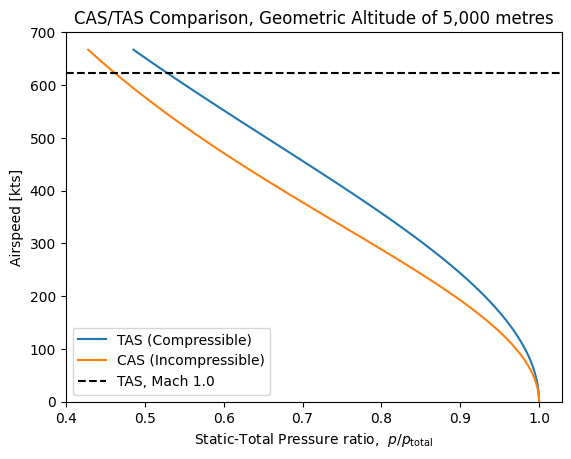

In [62]:
atm = at.Atmosphere()
z = 5e3
gamma = 1.4

# Compressible flow
V_KTAS = np.linspace(0, 667)
V_mpsTAS = uc.kts_mps(V_KTAS)
Vsound_mps = atm.vsound_mps(altitude_m=z)
Mach = V_mpsTAS / Vsound_mps
p_ratio_c = (1 + (gamma - 1) / 2 * Mach ** 2) ** (-gamma / (gamma - 1))
# dp_c = (1 / p_ratio_c - 1) * atm.airpress_pa(altitude_m=z)

# Incompressible flow
V_KCAS = np.copy(V_KTAS)
V_mpsCAS = uc.kts_mps(V_KCAS)
dp = 0.5 * 1.225 * V_mpsCAS ** 2
p_ratio = 1 / (1 + dp / atm.airpress_pa(altitude_m=z))

fig, ax = plt.subplots()
ax.set_title(f"CAS/TAS Comparison, Geometric Altitude of {z:,.0f} metres")
ax.plot(p_ratio_c, V_KTAS, label="TAS (Compressible)")
ax.plot(p_ratio, V_KCAS, label="CAS (Incompressible)")
ax.axhline(uc.mps_kts(Vsound_mps), c="k", ls="--", label="TAS, Mach 1.0")
ax.set_xlabel("Static-Total Pressure ratio,  $p / p_{\\text{total}}$")
ax.set_ylabel("Airspeed [kts]")
ax.set_ylim(0, None)
ax.legend()
plt.show()

> 📝 **Note:** in reality, $M \gtrsim 1$ flows would almost certainly necessitate the use of shock-jump relations (not shown here) to accurately report supersonic freestream speeds using a pitot tube!

In the above example, we know from Bernoulli's principle that the freestream has identical static, dynamic, and total pressure components in each of the compressible and incompressible scenarios.
Bernoulli's principle breaks down when we consider compressible flow, which is the case when the flow is brought to rest inside of the Pitot tube.

> 💡 **Consider:** We set a constant altitude, and so static pressure is constant.
> The only way to explain the difference in the static-total pressure ratio at a given airspeed then is to suggest that the total pressure in the compressible case is less than the total pressure in the incompressible case.
> Intuitively this is because flow kinetic energy that would've been spent raising the dynamic pressure component when being brought to rest, has instead been spent compressing the fluid.

$$
p_{\text{total}} - p_{\text{static}} = 
\begin{cases}
\tfrac{1}{2} \rho V^2 & \text{(incompressible)}\\
\tfrac{1}{2} \rho V^2 + \Delta p_c & \text{(compressible)} \quad \text{with} \quad p_c \leq 0
\end{cases}
$$

#### Conversion from TAS to CAS

Recall that...

> The incompressible static-to-total pressure ratio from Bernoulli's principle is

$$
\frac{p_{\text{static}}}{p_{\text{total}}}
= \frac{1}{1 + (p_{\text{total}} - p_{\text{static}}) / p_{\text{static}}}
= \frac{1}{1 + (\tfrac{1}{2}\rho_{\text{SL}}{V_{\text{CAS}}}^2) / p_{\text{static}}}
$$
> Isentropic flow relations tell us that in a compressible flow

$$
\frac{p_{\text{static}}}{p_{\text{total}}}
= \left(1 + \frac{\gamma - 1}{2} M^2 \right)^{-\gamma / (\gamma -1)}
\quad \text{with} \quad
M = \frac{V_{\text{TAS}}}{a}
$$

Equating expressions

$$
\frac{1}{1 + (\tfrac{1}{2}\rho_{\text{SL}}{V_{\text{CAS}}}^2) / p_{\text{static}}}
= \left(1 + \frac{\gamma - 1}{2} M^2 \right)^{-\gamma / (\gamma -1)}
$$

Solve for CAS

$$
1 + \left(\frac{1}{2}\rho_{\text{SL}}{V_{\text{CAS}}}^2\right) / p_{\text{static}}
= \left(1 + \frac{\gamma - 1}{2} M^2 \right)^{\gamma / (\gamma -1)}
$$

$$
\frac{1}{2}\rho_{\text{SL}}{V_{\text{CAS}}}^2
= p_{\text{static}} \cdot \left[ \left(1 + \frac{\gamma - 1}{2} M^2 \right)^{\gamma / (\gamma -1)} - 1 \right]
$$

$$
V_{\text{CAS}}
= \sqrt{\frac{2 \times  p_{\text{static}}}{\rho_{\text{SL}}} \cdot \left[ \left(1 + \frac{\gamma - 1}{2} \left(\frac{V_{\text{TAS}}}{a} \right)^2 \right)^{\gamma / (\gamma -1)} - 1 \right]}
$$

Since ambient pressure cleanly maps to an altitude from which the local speed of sound can be computed using an atmospheric model, CAS is easily related to TAS through knowledge of the local speed of sound, adiabatic index, static pressure, and sea-level density.

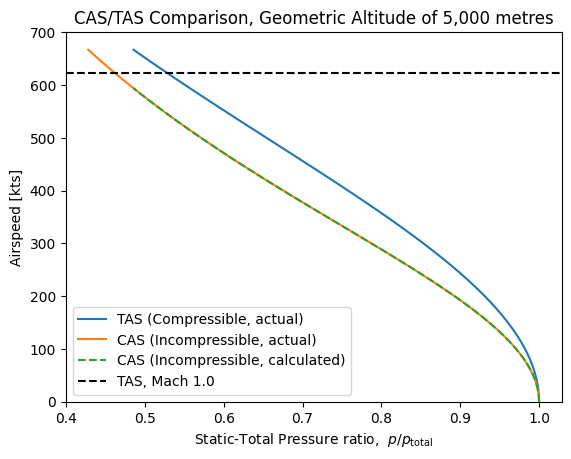

In [74]:
atm = at.Atmosphere()
z = 5e3
gamma = 1.4

# Compressible flow
V_KTAS = np.linspace(0, 667)

# Incompressible flow (calculated)
V_mpsTAS = uc.kts_mps(V_KTAS)
Vsound_mps = atm.vsound_mps(altitude_m=z)
Mach = V_mpsTAS / Vsound_mps
p_ratio_c = (1 + (gamma - 1) / 2 * Mach ** 2) ** (-gamma / (gamma - 1))
p = atm.airpress_pa(altitude_m=z)
V_mpsCAS_calc = (2 * p / 1.225 * (1 / p_ratio_c - 1)) ** 0.5
V_KCAS_calc = uc.mps_kts(V_mpsCAS_calc)

fig, ax = plt.subplots()
ax.set_title(f"CAS/TAS Comparison, Geometric Altitude of {z:,.0f} metres")
ax.plot(p_ratio_c, V_KTAS, label="TAS (Compressible, actual)")
ax.plot(p_ratio, V_KCAS, label="CAS (Incompressible, actual)")
ax.plot(p_ratio_c, V_KCAS_calc, label="CAS (Incompressible, calculated)", ls="--")
ax.axhline(uc.mps_kts(Vsound_mps), c="k", ls="--", label="TAS, Mach 1.0")
ax.set_xlabel("Static-Total Pressure ratio,  $p / p_{\\text{total}}$")
ax.set_ylabel("Airspeed [kts]")
ax.set_ylim(0, None)
ax.legend()
plt.show()

Of course, it is possible to solve the other way around to obtain true airspeed from Mach number (and trivially convert between it and equivalent airspeed, which we'll take a look at momentarily).

### Ground Speed **(GS)**

If TAS is the freestream speed, TAS is also the ground speed GS on a windless day.
More often than not however, there is a component of the wind velocity vector aligned with the direction of vehicle travel.
Subtracting a headwind from the TAS gives the ground speed, and adding a tail wind component increases the distance travelled for the same aerodynamic drag (hence why you can get to your destination faster when you have the assistance of a tailwind).

In modern aircraft, GPS (potentially fused with inertial measurement data) is a far more dependable means of determining the vehicle's horizontal speed over the Earth's surface.

### Equivalent Airspeed **(EAS)**

It would be tiresome to compute TAS limiting conditions for every applicable altitude of operation.
Instead, aircraft designers map TAS to the *equivalent airspeed* EAS, known as the sea-level airspeed that raises an equivalent compressible dynamic pressure the true airspeed does when at altitude

$$V_{\text{EAS}} = V_{\text{TAS}} \cdot \sqrt{\rho / \rho_{\text{SL}}}$$

Re-using data from the previous example of calibrated versus true airspeed...

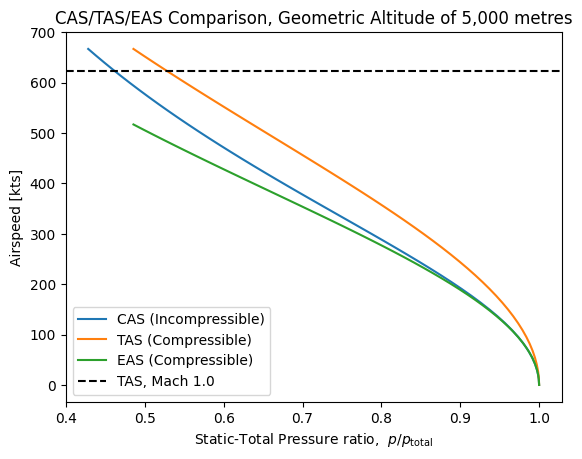

In [63]:
V_KEAS = atm.tas2eas(V_KTAS, altitude_m=z)

fig, ax = plt.subplots()
ax.set_title(f"CAS/TAS/EAS Comparison, Geometric Altitude of {z:,.0f} metres")
ax.set_xlabel("Static-Total Pressure ratio,  $p / p_{\\text{total}}$")
ax.set_ylabel("Airspeed [kts]")
ax.plot(p_ratio, V_KCAS, label="CAS (Incompressible)")
ax.plot(p_ratio_c, V_KTAS, label="TAS (Compressible)")
ax.plot(p_ratio_c, V_KEAS, label="EAS (Compressible)")
ax.axhline(uc.mps_kts(1.0 * Vsound_mps), ls="--", c="k", label="TAS, Mach 1.0")
ax.legend()
plt.show()

What this chart shows is that for a measured pressure differential, the following is true

$$V_{\text{EAS}} \leq V_{\text{CAS}} \leq V_{\text{TAS}}$$

Equivalent airspeed is the easiest type of speed to regulate airworthiness with.
It accounts for compressibility in a sea-level normalised metric, allowing the prescription of speeds that cleanly relate to aerodynamic loading and aircraft structural limits, in an altitude-independent manner.

$$
\begin{eqnarray}
L
&=& q \cdot S C_L
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_L &&
&=& \tfrac{1}{2} \rho_{\text{SL}} {V_{\text{EAS}}}^2 \cdot S C_L &&\\ \\
D
&=& q \cdot S C_D
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_D &&
&=& \tfrac{1}{2} \rho_{\text{SL}} {V_{\text{EAS}}}^2 \cdot S C_D &&\\ \\
M
&=& q \cdot S C_M \cdot c \,\,
&=& \tfrac{1}{2} \rho {V_{\text{TAS}}}^2 \cdot S C_M &\cdot c&
&=& \tfrac{1}{2} \rho_{\text{SL}} {V_{\text{EAS}}}^2 \cdot S C_M &\cdot c&\\
\end{eqnarray}
$$